### Classification based on text lenght

In [38]:
import numpy as np
import pandas as pd
df = pd.read_csv('UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep='\t')
df.head()
#length - the number of characters in each message
#punct - the number of punctuation characters in each message

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


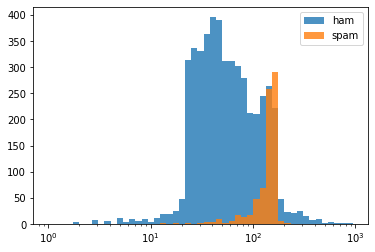

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [41]:
X = df[['length','punct']]  
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')  # log reg
lr_model.fit(X_train, y_train)
from sklearn import metrics
predictions = lr_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [42]:
from sklearn.svm import SVC  #SVM performs better
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


### Scikit-learn's CountVectorizer / TfidfVectorizer.    Bag-of-words

Use the occurrence of specific words  ####
CountVectorizer: Text preprocessing, tokenizing and the ability to filter out stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

In [43]:
X = df['message']  
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In the future, we can combine the CountVectorizer and TfidTransformer steps into one using TfidVectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(3733, 7082)

In [47]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])
text_clf.fit(X_train, y_train)  
predictions = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]
